In [278]:
!python --version

Python 3.9.13


In [279]:
import numpy as np
np.__version__

'2.0.2'

In [280]:
import pandas as pd
pd.__version__

'2.3.0+4.g1dfc98e16a'

In [281]:
def f(x):
    return 2 * x + 1

x = np.linspace(-5,5,10)
y = f(x)

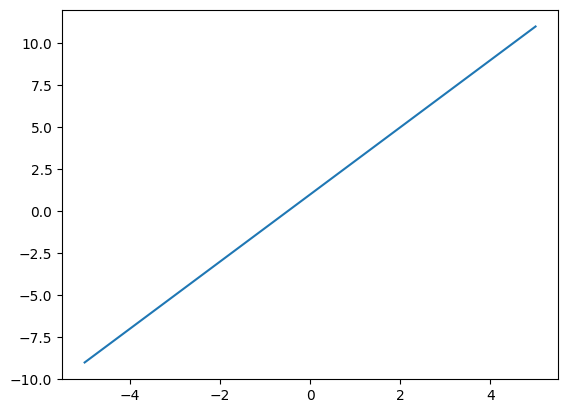

In [282]:
import matplotlib.pyplot as plt

plt.plot(x,y)

In [283]:
data = np.random.randn(3,5)
data.shape

(3, 5)

In [284]:
data = np.random.normal(0,1,(150,4))
data.shape

(150, 4)

In [285]:
np.mean(data)

np.float64(0.03810490909831613)

In [286]:
A = np.random.rand(3,4)
B = np.random.rand(4,3)
print(A.shape,B.shape)

(3, 4) (4, 3)


In [287]:
(A @ B).shape

(3, 3)

In [288]:
A = np.random.rand(5)
B = np.random.rand(5)
A.reshape(5,1)

(A @ B).shape

()

In [289]:
import pandas as pd
import seaborn as sns

In [290]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [291]:
df["age"].isna().sum()

np.int64(177)

In [292]:
df_age = df.fillna({"age": df["age"].mean()}, inplace=True)

In [293]:
df["sex"].apply(lambda x: 0 if x == "male" else 1)

def f(x):
    if x == "male" : return 0
    return 1

df.loc[:, "sex"] = df["sex"].apply(f)
df['sex'] = df['sex'].astype('int')


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB


In [295]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [296]:
maks = df["embarked"].isna()

df.loc[maks,:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,1,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,1,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [297]:
pd.Categorical(df["embarked"])

['S', 'C', 'S', 'S', 'S', ..., 'S', 'S', 'S', 'C', 'Q']
Length: 891
Categories (3, object): ['C', 'Q', 'S']

In [298]:
df["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [299]:
df = df.drop(['deck'], axis=1) # deck열 자체를 날려버리기
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [300]:
df.groupby(["class"])["survived"].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_22408\2988013172.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["class"])["survived"].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

<Axes: >

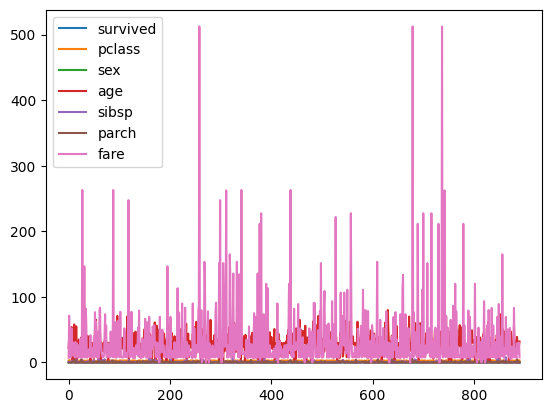

In [301]:
df.plot()

<Axes: xlabel='survived'>

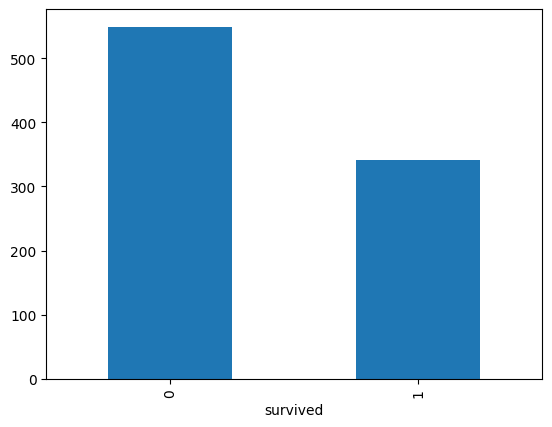

In [302]:
df.groupby(['survived'])['survived'].count().plot.bar()

C:\Users\user\AppData\Local\Temp\ipykernel_22408\1823253730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['class'])['class'].count().plot.bar()


<Axes: xlabel='class'>

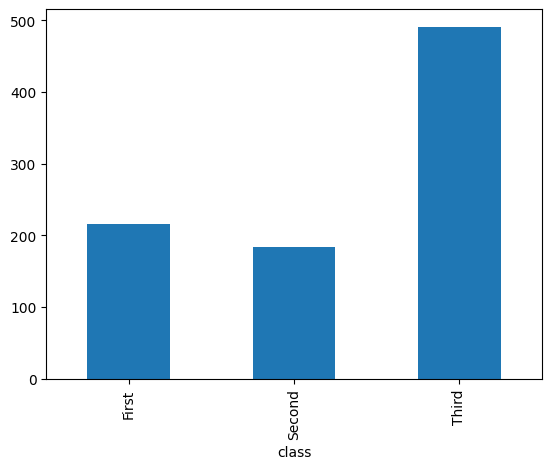

In [303]:
df.groupby(['class'])['class'].count().plot.bar()

<Axes: xlabel='age', ylabel='survived'>

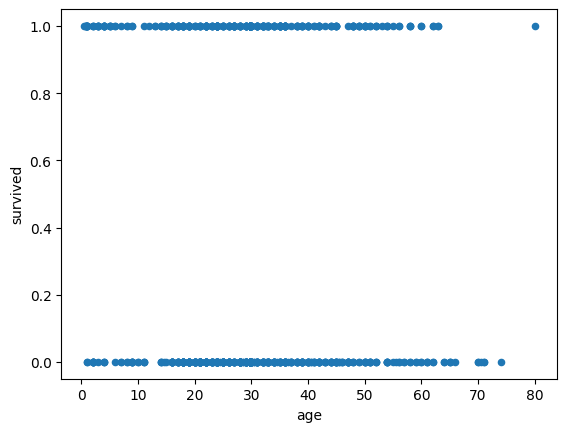

In [304]:
df.plot.scatter(x="age", y="survived")

In [305]:
df.groupby(['survived', 'class', 'sex']).size()

C:\Users\user\AppData\Local\Temp\ipykernel_22408\139909392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['survived', 'class', 'sex']).size()


survived  class   sex
0         First   0       77
                  1        3
          Second  0       91
                  1        6
          Third   0      300
                  1       72
1         First   0       45
                  1       91
          Second  0       17
                  1       70
          Third   0       47
                  1       72
dtype: int64

In [306]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# 시계열 다루기 P. 219 ~ 228
- TimeStamp : 2015년 6월 5일 오전 4시

In [307]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [308]:
from dateutil import parser
date = parser.parse("4th of july, 2021") # 문자열로부터 날짜 가져오기
date

datetime.datetime(2021, 7, 4, 0, 0)

In [309]:
date = parser.parse("2025년 6월 3일") # 아쉽게도 안됨.
date

ParserError: Unknown string format: 2025년 6월 3일

In [ ]:
date.strftime('%A') # 요일 출력

'Sunday'

In [ ]:
today = datetime(2025,7,30)
# today + 1 안됨.

## Nump에서의 시계열

In [ ]:
date = np.array('2021-07-04', dtype=np.datetime64) # Numpy에서의 시간 배열
date

array('2021-07-04', dtype='datetime64[D]')

In [ ]:
date + np.arange(12) # 특정 기간까지의 날짜 모두 출력

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

In [ ]:
np.datetime64('2021-07-04 12:00')

np.datetime64('2021-07-04T12:00')

In [ ]:
np.datetime64('2021-07-04 12:59:59.50', 'ns') # 시간 단위를 나노초로 설정

np.datetime64('2021-07-04T12:59:59.500000000')

## Pandas에서의 시계열

In [ ]:
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas 시간으로 인덱싱

In [ ]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',  # 날짜를 인덱스로 설정 가능
                          '2021-07-04', '2021-08-04'])
date = pd.Series([0, 1, 2, 3], index=index)
date

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [ ]:
date['2020-07-04':'2021-07-04'] # 날짜로 인덱싱 가능

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [ ]:
date['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

### Pandas 시계열 데이터 구조

## Pandas 실습

In [ ]:
bicycle_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv'
bicycle_df = pd.read_csv(bicycle_url)

In [ ]:
bicycle_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [313]:
bicycle_df['date'] = pd.to_datetime(bicycle_df['Date'],format='%m/%d/%Y %H:%M:%S %p').so
bicycle_df = bicycle_df.set_index(['Date'])

KeyError: 'Date'

In [ ]:
bicycle_df = bicycle_df.set_index(['Date'])

KeyError: "None of ['Date'] are in the columns"

In [ ]:
bicycle_df.index.is_monotonic_increasing

False

In [ ]:
bicycle_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [314]:
import yfinance as yf

ticker = 'TSLA'

df = yf.download(ticker, start='2020-01-01', end='2025-07-10')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_22408\1539787914.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2025-07-10')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [317]:
df.loc[:,('Close', 'TSLA')]

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2025-07-02    315.649994
2025-07-03    315.350006
2025-07-07    293.940002
2025-07-08    297.809998
2025-07-09    295.880005
Name: (Close, TSLA), Length: 1386, dtype: float64

<Axes: xlabel='Date'>

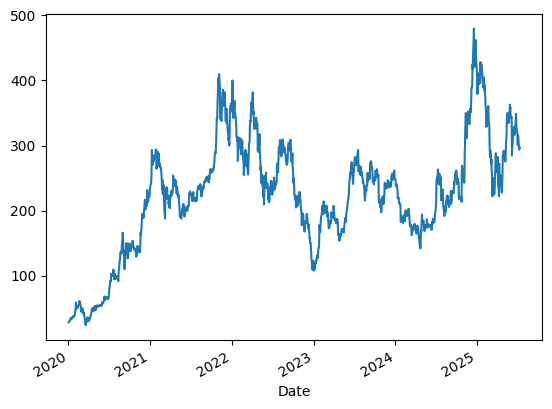

In [ ]:
df.loc[:,('Close', 'TSLA')].plot()

In [319]:
tesla_df = df.loc[:,('Close', 'TSLA')]

<Axes: xlabel='Date'>

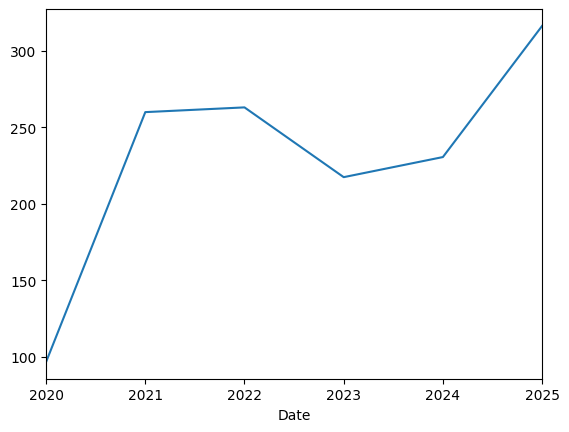

In [331]:
tesla_df.resample('BYE').mean().plot()

C:\Users\user\AppData\Local\Temp\ipykernel_22408\3465706880.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  tesla_df.asfreq("BA").plot()


<Axes: xlabel='Date'>

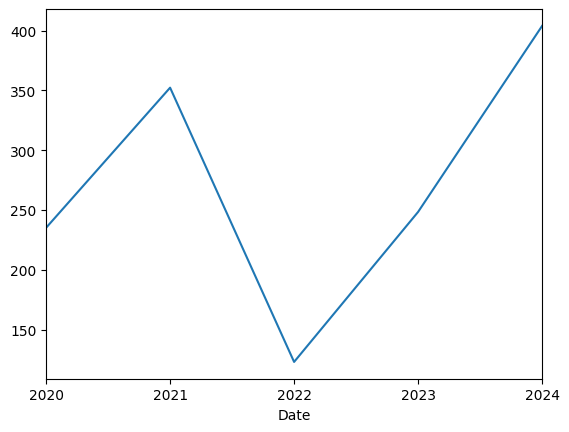

In [325]:
tesla_df.asfreq("BA").plot()

In [333]:
tesla_df

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2025-07-02    315.649994
2025-07-03    315.350006
2025-07-07    293.940002
2025-07-08    297.809998
2025-07-09    295.880005
Name: (Close, TSLA), Length: 1386, dtype: float64

In [332]:
tesla_df.shift(-365)

Date
2020-01-02    199.786667
2020-01-03    201.623337
2020-01-06    205.533340
2020-01-07    207.770004
2020-01-08    206.943329
                 ...    
2025-07-02           NaN
2025-07-03           NaN
2025-07-07           NaN
2025-07-08           NaN
2025-07-09           NaN
Name: (Close, TSLA), Length: 1386, dtype: float64

<Axes: xlabel='Date'>

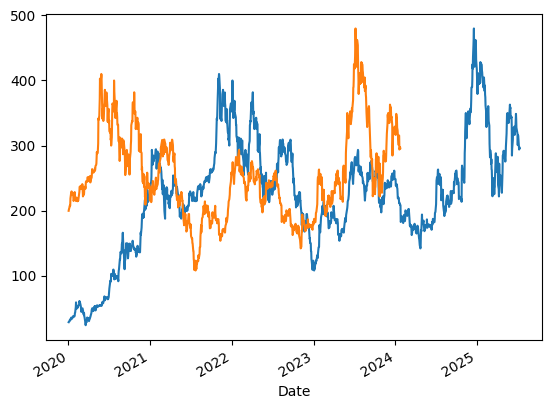

In [336]:
tesla_df.plot()
tesla_df.shift(-365).plot()

In [344]:
tesla_df.rolling(5).mean() # 2020-01-08 이 앞에 5일의 평균

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08     30.480133
                 ...    
2025-07-02    316.685999
2025-07-03    314.600000
2025-07-07    308.662000
2025-07-08    304.691998
2025-07-09    303.726001
Name: (Close, TSLA), Length: 1386, dtype: float64

<Axes: xlabel='Date'>

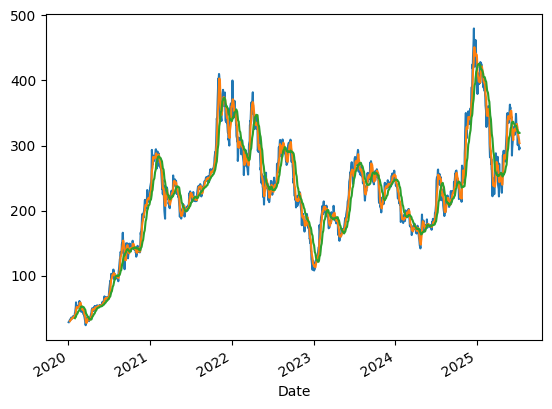

In [342]:
tesla_df.plot()
tesla_df.rolling(5).mean().plot()
tesla_df.rolling(20).mean().plot()

## 예제: 시애틀 자전거 수 시각화 (* 중요)